In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.array([[0, 0, 1],
             [0, 1, 1],
             [1, 0, 1],
             [1, 1, 1]])

y = np.array([[0], [1], [1], [0]])

In [3]:
print(x)
print(y)

[[0 0 1]
 [0 1 1]
 [1 0 1]
 [1 1 1]]
[[0]
 [1]
 [1]
 [0]]


In [4]:
# Model definition

num_epochs = 100000


# 5 neurons in the hidden layer
syn0 = 2 * np.random.random((3, 5)) - 1
syn1 = 2 * np.random.random((5, 1)) - 1

In [5]:
print(syn0)

[[ 0.82972405 -0.99059598  0.53640745 -0.01229599  0.77451619]
 [-0.98282029  0.5313527   0.21847215 -0.88951974  0.27265478]
 [ 0.51283914 -0.69542129  0.45660586 -0.83166454  0.29678542]]


In [6]:
print(syn1)

[[-0.77682469]
 [-0.83469832]
 [ 0.00654045]
 [-0.0571798 ]
 [ 0.16419268]]


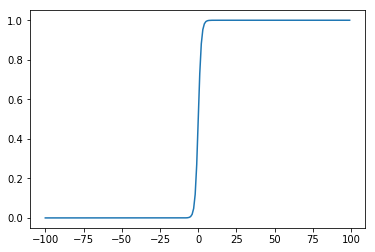

In [7]:
# Sigmoid function to bound values between 0 and 1 at the output of each neuron
def sigmoid(x, deriv = False):
    if deriv:
        return x * (1 - x)
        
    x = 1 / (1 + np.exp(-x))

    return x

x_axis = range(-100, 100)
y_axis = []
for value in x_axis:
    y = sigmoid(value)
    y_axis.append(y)

plt.plot(x_axis, y_axis)
plt.show()

In [8]:
# Train Function
def train(x, y, syn0, syn1, num_epochs):
    accumulated_errors = []
    for epoch in range(num_epochs):
        l0 = x
        l1 = sigmoid(np.dot(l0, syn0))
        l2 = sigmoid(np.dot(l1, syn1))
        
        #  Error at the output layer
        l2_error = y - l2
        
        # Derivative of the error for Gradient Descent
        l2_derivative = l2_error * sigmoid(l2, deriv=True)
        
        # Contribution of l2 to l1
        l1_error = l2_derivative.dot(syn1.T)
        
        training_error = np.mean(abs(l2_error))
        accumulated_errors.append(training_error)
        
        if epoch % 1000 == 0:
            print(" Training .....  \t Error : {0}".format(training_error))
        
        # Derivative for gradient descent 
        l1_derivative = l1_error * sigmoid(l1, deriv=True)
        
        # Update the weights 
        syn1 += np.dot(l1.T, l2_derivative)
        syn0 += np.dot(l0.T, l1_derivative)
    print("Error: {0}".format(training_error))
    return accumulated_errors

In [9]:
errors = train(x, y, syn0, syn1, num_epochs)

 Training .....  	 Error : 0.64735817221
 Training .....  	 Error : 0.00749030275861
 Training .....  	 Error : 0.0051646963561
 Training .....  	 Error : 0.00416118071978
 Training .....  	 Error : 0.00357175666401
 Training .....  	 Error : 0.00317359754301
 Training .....  	 Error : 0.00288195051041
 Training .....  	 Error : 0.00265667937845


 Training .....  	 Error : 0.00247602288152
 Training .....  	 Error : 0.00232703532179
 Training .....  	 Error : 0.00220147435107
 Training .....  	 Error : 0.00209381229782
 Training .....  	 Error : 0.00200018650644
 Training .....  	 Error : 0.00191780623917
 Training .....  	 Error : 0.00184459871302
 Training .....  	 Error : 0.00177898814309


 Training .....  	 Error : 0.00171975252537
 Training .....  	 Error : 0.00166592779111
 Training .....  	 Error : 0.00161674187342
 Training .....  	 Error : 0.00157156825077
 Training .....  	 Error : 0.00152989251777
 Training .....  	 Error : 0.00149128787725
 Training .....  	 Error : 0.00145539687175
 Training .....  	 Error : 0.00142191756103


 Training .....  	 Error : 0.00139059292178
 Training .....  	 Error : 0.00136120261835
 Training .....  	 Error : 0.00133355654257
 Training .....  	 Error : 0.00130748969042
 Training .....  	 Error : 0.00128285806059
 Training .....  	 Error : 0.00125953534264
 Training .....  	 Error : 0.00123741022126
 Training .....  	 Error : 0.00121638416575


 Training .....  	 Error : 0.00119636960478
 Training .....  	 Error : 0.00117728840955
 Training .....  	 Error : 0.00115907062572
 Training .....  	 Error : 0.00114165340717
 Training .....  	 Error : 0.00112498011492
 Training .....  	 Error : 0.00110899955157
 Training .....  	 Error : 0.00109366530811
 Training .....  	 Error : 0.00107893520385
 Training .....  	 Error : 0.00106477080441


 Training .....  	 Error : 0.00105113700509
 Training .....  	 Error : 0.00103800166952
 Training .....  	 Error : 0.00102533531497
 Training .....  	 Error : 0.00101311083754
 Training .....  	 Error : 0.00100130327129
 Training .....  	 Error : 0.000989889576523
 Training .....  	 Error : 0.000978848453053
 Training .....  	 Error : 0.000968160175185
 Training .....  	 Error : 0.000957806445371


 Training .....  	 Error : 0.000947770264155
 Training .....  	 Error : 0.000938035814291
 Training .....  	 Error : 0.000928588357247
 Training .....  	 Error : 0.00091941414056
 Training .....  	 Error : 0.000910500314726
 Training .....  	 Error : 0.000901834858489
 Training .....  	 Error : 0.000893406511536
 Training .....  	 Error : 0.000885204713758


 Training .....  	 Error : 0.000877219550323
 Training .....  	 Error : 0.000869441701925
 Training .....  	 Error : 0.000861862399635
 Training .....  	 Error : 0.000854473383859
 Training .....  	 Error : 0.000847266866984
 Training .....  	 Error : 0.000840235499298
 Training .....  	 Error : 0.000833372337886
 Training .....  	 Error : 0.000826670818165


 Training .....  	 Error : 0.000820124727827
 Training .....  	 Error : 0.000813728182934
 Training .....  	 Error : 0.000807475605964
 Training .....  	 Error : 0.000801361705627
 Training .....  	 Error : 0.000795381458274
 Training .....  	 Error : 0.00078953009077
 Training .....  	 Error : 0.000783803064676
 Training .....  	 Error : 0.000778196061641


 Training .....  	 Error : 0.000772704969885
 Training .....  	 Error : 0.000767325871685
 Training .....  	 Error : 0.000762055031771
 Training .....  	 Error : 0.000756888886561
 Training .....  	 Error : 0.000751824034162
 Training .....  	 Error : 0.000746857225069
 Training .....  	 Error : 0.000741985353513
 Training .....  	 Error : 0.000737205449402


 Training .....  	 Error : 0.000732514670801
 Training .....  	 Error : 0.000727910296922
 Training .....  	 Error : 0.000723389721572
 Training .....  	 Error : 0.000718950447032
 Training .....  	 Error : 0.000714590078324
 Training .....  	 Error : 0.000710306317853
 Training .....  	 Error : 0.000706096960379


 Training .....  	 Error : 0.000701959888305
 Training .....  	 Error : 0.000697893067256
 Training .....  	 Error : 0.000693894541927
 Training .....  	 Error : 0.000689962432177
 Training .....  	 Error : 0.000686094929365
 Training .....  	 Error : 0.000682290292892
 Training .....  	 Error : 0.000678546846952
 Training .....  	 Error : 0.000674862977467


 Training .....  	 Error : 0.000671237129199
 Training .....  	 Error : 0.000667667803023
 Training .....  	 Error : 0.000664153553356
Error: 0.000660696419929


In [10]:
def plot_learning_curve(errors, num_epochs):
    plt.plot(range(num_epochs), errors)
    plt.xlabel(' Number of Iterations')
    plt.ylabel( ' Training error')
    plt.title(' Training Curve')
    plt.show()

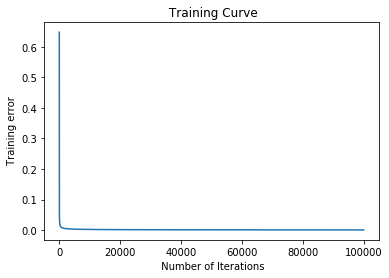

In [11]:
plot_learning_curve(errors, num_epochs)